# ✨💻 Trabalho 1 - Atividade Prática

##🔍Equipe: Ariane Barros e Camila Perazzo

# Importação geral

# Enunciado 1

In [341]:
!pip install opencv-python

In [342]:
!pip install colortrans

In [343]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import requests
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pywt
import matplotlib.pylab as pylab
import colortrans


In [344]:
from PIL import Image
from google.colab.patches import cv2_imshow
from skimage.io import imread
from io import BytesIO

Artigo 1 - Uso de visão computacional para análise de postura de usuário de smartphone

Esse artigo analisa a performance de algoritmos de visão computacional embarcados em smartphones e tablets. Por meio de camêras com sensor de profundidade (TrueDeph) e framework Core ML, da Apple, foi avaliado em smartphone IOS. Primeiramente são identificados os pontos de articulação, e então seus ângulos de inclinação em relação ao eixo vertical e horizontal. A pesquisa cobriu 3 cenários: ADM (amplitude do movimento) da cervical, postura frontal e postura lateral do corpo. A plataforma obteve

Link: https://adelpha-api.mackenzie.br/server/api/core/bitstreams/e1277a1d-d53d-4846-abe5-eb66f661a8cf/content


Artigo 2 - Detecção de Plantas Daninhas em Culturas de Soja usando Redes Neurais Convolucionais



Neste artigo, os pesquisadores utilizaram a tecnologia de Redes Neurais Convolucionais, ConvNets, para detectar ervas daninhas em lavouras de soja, classificando-as em gramíneas e folhas largas. Eles coletaram imagens de lavouras de soja usando um drone Phantom DJI 3 Professional e criaram um extenso banco de dados com mais de quinze mil imagens de solo, soja e plantas daninhas. Para treinar a rede neural, eles utilizaram a arquitetura CaffeNet. Além disso,  um software chamado Pynovisão foi desenvolvido para segmentar as imagens usando o algoritmo SLIC e classificar as plantas com base no modelo treinado. Os resultados mostraram uma precisão superior a 98% na detecção de ervas daninhas em relação ao solo e à soja, com uma média de precisão acima de 99% em todas as imagens. Esta abordagem de Deep Learning oferece uma solução promissora para o controle de plantas daninhas em culturas de soja, melhorando a eficiência e a qualidade da produção agrícola.

Link: https://www.sciencedirect.com/science/article/abs/pii/S0168169917301977?via%3Dihub

Matéria 1 - Baidu supera performance de Google e Microsoft no reconhecimento de imagens

Um time de desenvolvimento na área de deep learning na visão computacional do navegador chinês Baidu superou o Google e Microsoft no reconhecimento de imagens. O uso de uma imensa infrastrutura de hardwares foi um dos fatores que ajudou a superação da performance, foram utilizados "supercomputadores", no total de 432 CPUs. Outra estratégia interessante que foi utilizada para previnir overfitting foi a modificação da imagem de input com filtro de cores. Outro ponto interessante mencionado no artigo é que esse time chegou a uma taxa de erro de 4.58%, enquanto a taxa para humanos é mais perto de 5%. Esses resultados não representam como verdade absoluta que máquinas superaram humanos no reconhecimento de imagens, mas é um sinal que o uso de redes neurais está evoluindo.

Link da matéria: https://www.theguardian.com/global/2015/may/13/baidu-minwa-supercomputer-better-than-humans-recognising-images

Matéria 2 - Nova Inteligência Artificial Acelera Visão Computacional de Alta Resolução

Pesquisadores do MIT desenvolveram um modelo de visão computacional mais eficiente, chamado EfficientViT, que acelera a segmentação semântica em tempo real, ideal para veículos autônomos e outras tarefas de visão de alta resolução. Enquanto modelos anteriores cresceram em complexidade quadrática com a resolução da imagem, o EfficientViT mantém complexidade linear, sendo até nove vezes mais rápido com a mesma precisão. Além disso, o modelo apresentado usa um mecanismo mais simples para construir o mapa de atenção, equilibrando eficiência e desempenho, e é projetado para funcionar em dispositivos com recursos limitados, como veículos autônomos e dispositivos móveis.

Link da matéria: https://news.mit.edu/2023/ai-model-high-resolution-computer-vision-0912

# Enunciado 2

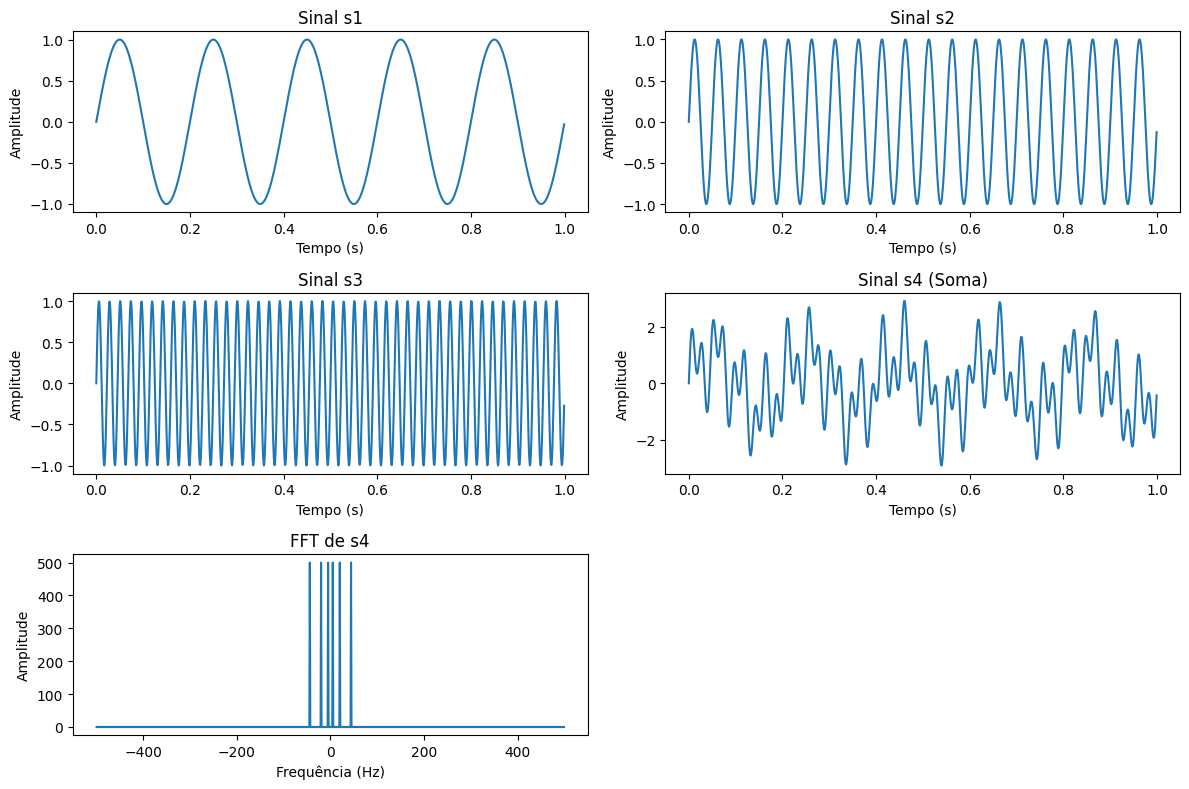

In [345]:
# Geração dos Sinais
fs = 1000  # Frequência de amostragem em Hz
t = np.arange(0, 1, 1/fs)  # Vetor de tempo de 1 segundo

# s1
f1 = 5
s1 = np.sin(2 * np.pi * f1 * t)

# s2
f2 = 20
s2 = np.sin(2 * np.pi * f2 * t)

# s3
f3 = 44
s3 = np.sin(2 * np.pi * f3 * t)

# O sinal s4 composto pela soma dos três sinais anteriores
s4 = s1 + s2 + s3

# FFT em s4
fft_result = np.fft.fft(s4)
freq = np.fft.fftfreq(len(fft_result), 1/fs)

# Plotagem dos Sinais e FFT
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(t, s1)
plt.title('Sinal s1')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 2)
plt.plot(t, s2)
plt.title('Sinal s2')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 3)
plt.plot(t, s3)
plt.title('Sinal s3')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 4)
plt.plot(t, s4)
plt.title('Sinal s4 (Soma)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 5)
plt.plot(freq, np.abs(fft_result))
plt.title('FFT de s4')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


# Enunciado 3

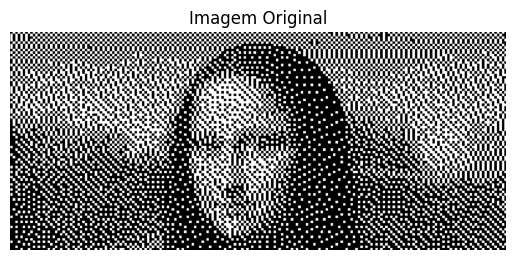

In [346]:
url = "https://a.tulv.in/uploads/screenshot-from-2021-02-23-19-04-26.png"
img_alpha = imread(url)

plt.title('Imagem Original')
plt.imshow(img_alpha)
plt.axis('off')
plt.show()

In [347]:
img_alpha.shape #Pelo valor da terceira dimensão, sabemos que a imagem tem um canal alfa

(650, 1477, 4)

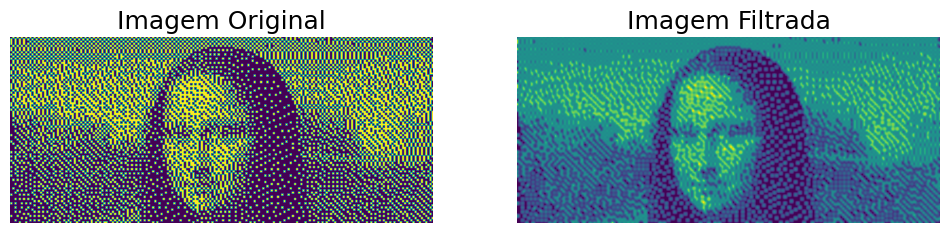

In [348]:
img = cv2.cvtColor(img_alpha, cv2.COLOR_BGR2GRAY).astype(np.float32);

filtragem  = cv2.blur(src=img,ksize=(13,13))

fig, axes = pylab.subplots(ncols=2, sharex=True, sharey=True, figsize=(12,6))

# Configurando o plot da imagem original
axes[0].set_title('Imagem Original', size=18)
axes[0].imshow(img)

# Configurando o plot da imagem filtrada
axes[1].set_title('Imagem Filtrada', size=18)
axes[1].imshow(filtragem)

for ax in axes:
    ax.axis('off')

pylab.show()

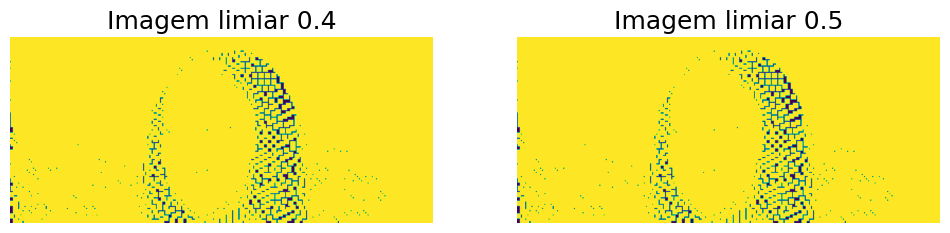

In [349]:
threshold_value = 0.4
thresholded_image_point_four = np.where(filtragem >= threshold_value, 1.0, 0.0)

threshold_value = 0.5
thresholded_image_point_five = np.where(filtragem >= threshold_value, 1.0, 0.0)

fig, axes = pylab.subplots(ncols=2, sharex=True, sharey=True, figsize=(12,6))

axes[0].set_title('Imagem limiar 0.4', size=18)
axes[0].imshow(thresholded_image_point_four)

axes[1].set_title('Imagem limiar 0.5', size=18)
axes[1].imshow(thresholded_image_point_five)

for ax in axes:
    ax.axis('off')

# Enunciado 4

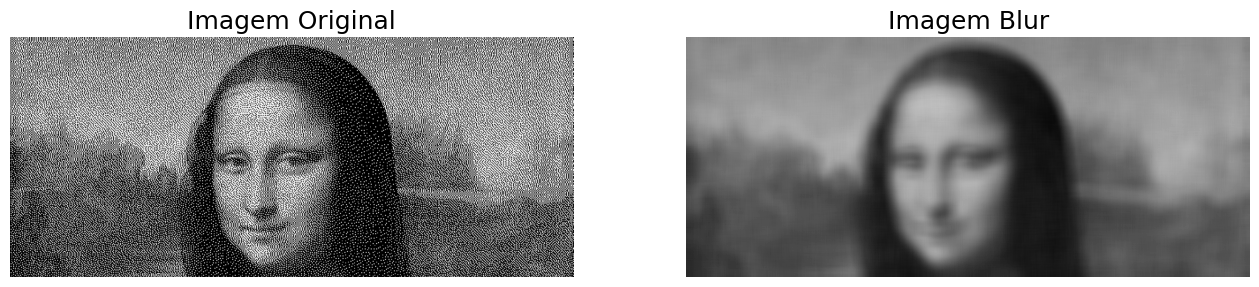

In [350]:
# Carregar a imagem da URL
url = "https://a.tulv.in/uploads/screenshot-from-2021-02-23-18-54-34.png"
response = requests.get(url)
image_data = BytesIO(response.content)
image = cv2.imdecode(np.frombuffer(image_data.read(), np.uint8), -1)

image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)

# Converter a imagem para escala de cinza
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar o filtro Blur (kernel = 47x47)
filtragem = cv2.blur(gray_image, (47, 47), 0)

# Exibir as imagens
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(16, 10))

axes[0].set_title('Imagem Original', size=18)
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].axis('off')

axes[1].set_title('Imagem Blur', size=18)
axes[1].imshow(filtragem, cmap='gray', vmin=0, vmax=255)
axes[1].axis('off')

plt.show()

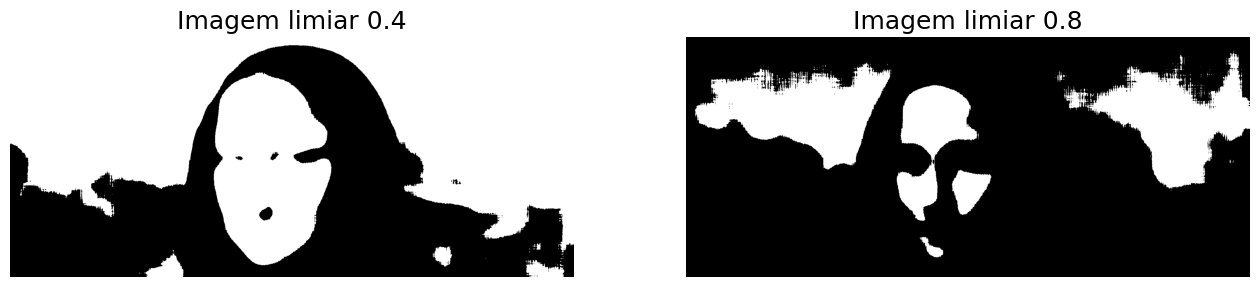

In [351]:
# Equalização de histograma para melhorar contraste
equalized_image = cv2.equalizeHist(filtragem)

# Binarizar a imagem com limiar 0.4 e 0.8
threshold_1 = 0.4
thresholded_1 = np.where(equalized_image >= threshold_1 * 255, 255, 0).astype(np.float32)

threshold_2 = 0.8
thresholded_2 = np.where(equalized_image >= threshold_2 * 255, 255, 0).astype(np.float32)

# Exibir as imagens binarizadas
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(16, 10))

axes[0].set_title('Imagem limiar 0.4', size=18)
axes[0].imshow(thresholded_1, cmap='gray', vmin=0, vmax=255)
axes[0].axis('off')

axes[1].set_title('Imagem limiar 0.8', size=18)
axes[1].imshow(thresholded_2, cmap='gray', vmin=0, vmax=255)
axes[1].axis('off')

plt.show()

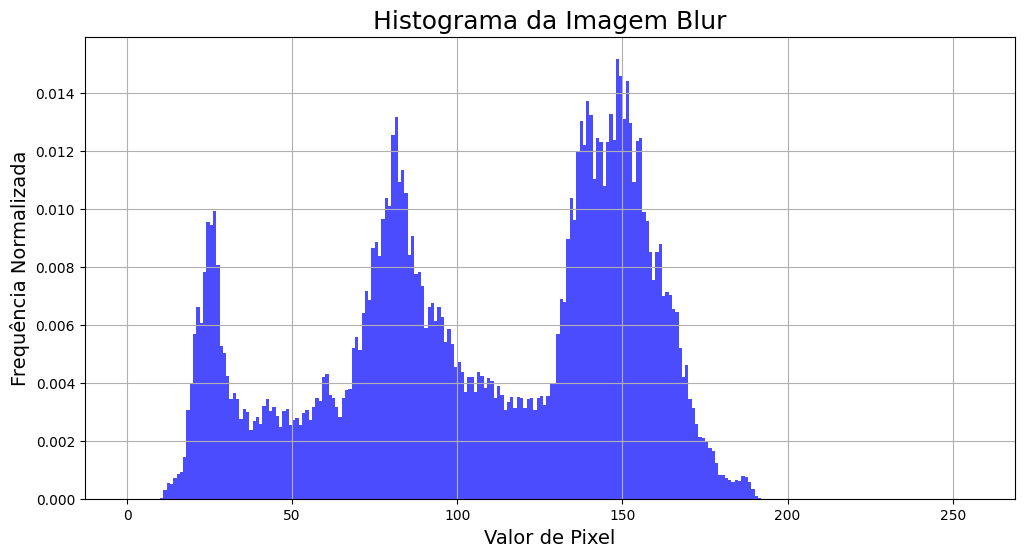

In [352]:
# Plote o histograma da imagem filtrada pelo filtro Blur
plt.figure(figsize=(12, 6))
plt.title('Histograma da Imagem Blur', size=18)
plt.hist(filtragem.ravel(), bins=256, range=(0, 256), density=True, color='blue', alpha=0.7)
plt.xlabel('Valor de Pixel', size=14)
plt.ylabel('Frequência Normalizada', size=14)
plt.grid()
plt.show()


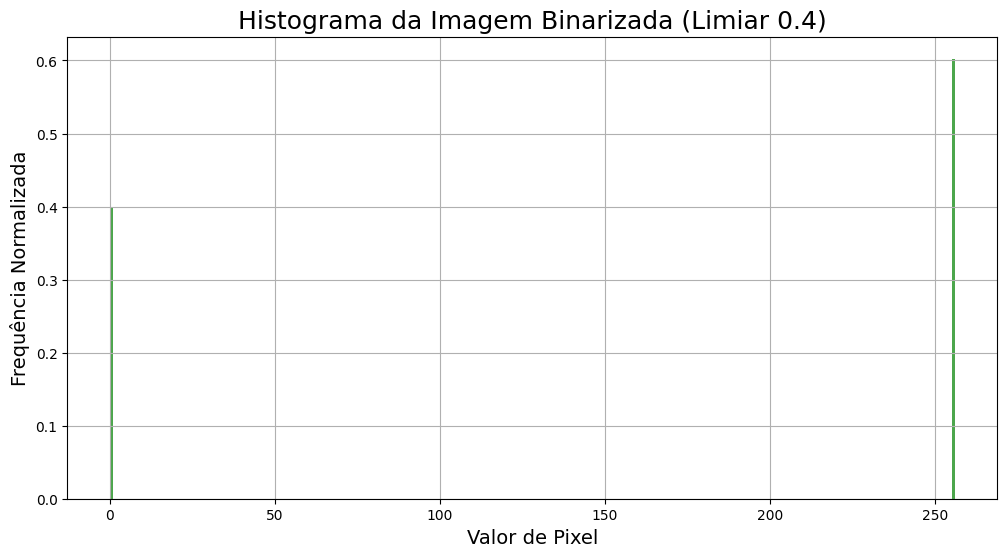

In [353]:
# Histograma da imagem produzida pela binarização (limiar 0.4)
plt.figure(figsize=(12, 6))
plt.title('Histograma da Imagem Binarizada (Limiar 0.4)', size=18)
plt.hist(thresholded_1.ravel(), bins=256, range=(0, 256), density=True, color='green', alpha=0.7)
plt.xlabel('Valor de Pixel', size=14)
plt.ylabel('Frequência Normalizada', size=14)
plt.grid()
plt.show()

# Enunciado 5

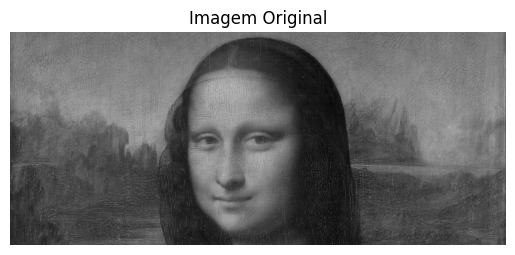

In [354]:
url = "https://a.tulv.in/uploads/screenshot-from-2021-02-23-18-38-08-copy.png"
img_alpha = imread(url)

plt.title('Imagem Original')
plt.imshow(img_alpha)
plt.axis('off')
plt.show()

In [355]:
img_alpha.shape #Pelo valor da terceira dimensão, sabemos que a imagem tem um canal alfa

(700, 1631, 4)

In [356]:
img = cv2.cvtColor(img_alpha, cv2.COLOR_BGR2GRAY).astype(np.float32);

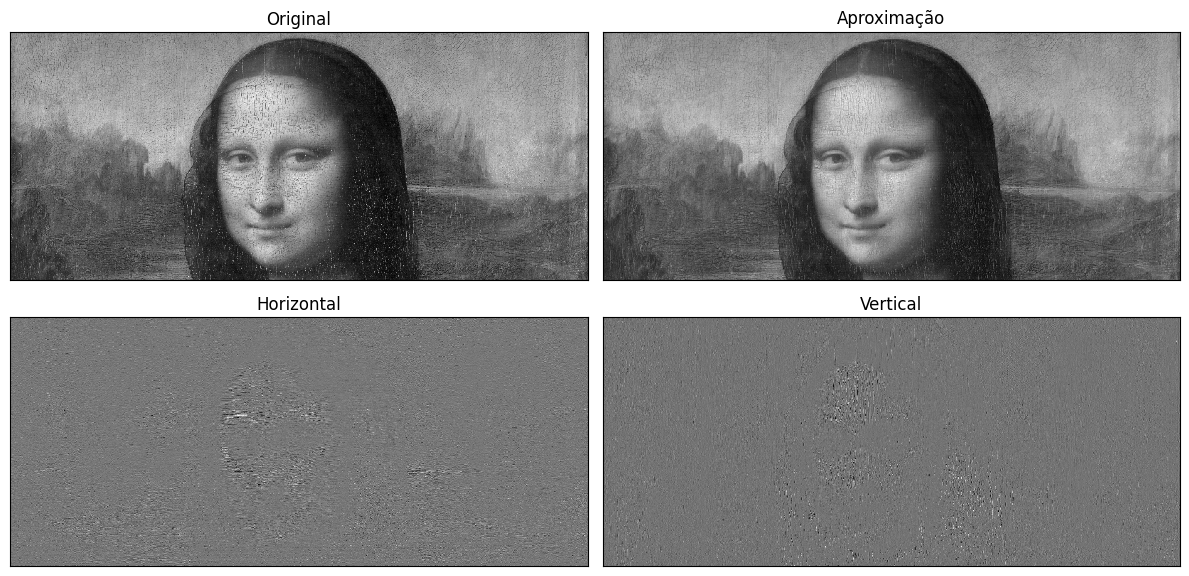

In [357]:
# Extrai os coeficientes da transformada em subbandas
coeffs = pywt.dwt2(img, 'db4')
LL, (LH, HL, HH) = coeffs

fig = plt.figure(figsize=(12, 6))
titles = ['Original', 'Aproximação', 'Horizontal', 'Vertical']

# Loop para plotar cada subbanda
for i, a in enumerate([img, LL, LH, HL]):
    # Define o número de linhas e colunas da grade
    rows = 2
    cols = 2

    # Adiciona a subplot atual à grade
    ax = fig.add_subplot(rows, cols, i + 1)

    # Plota a subbanda atual
    ax.imshow(a, interpolation='nearest', cmap=plt.cm.gray)

    # Define o título da subplot
    ax.set_title(titles[i], fontsize=12)

    # Remove os ticks dos eixos x e y
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()  # Ajusta automaticamente a disposição das subplots
plt.show()


# Enunciado 6

In [358]:
# URL da imagem base
url = "https://cdn.pixabay.com/photo/2017/09/16/19/33/parrot-2756488_1280.jpg"

response = requests.get(url)
image_data = BytesIO(response.content)

image = Image.open(image_data)

image.save('original.png', 'PNG')

# URL da imagem referência
url = "https://cdn.pixabay.com/photo/2017/08/30/12/45/girl-2696947_1280.jpg"

response = requests.get(url)
image_data = BytesIO(response.content)

image = Image.open(image_data)

image.save('reference.png', 'PNG')

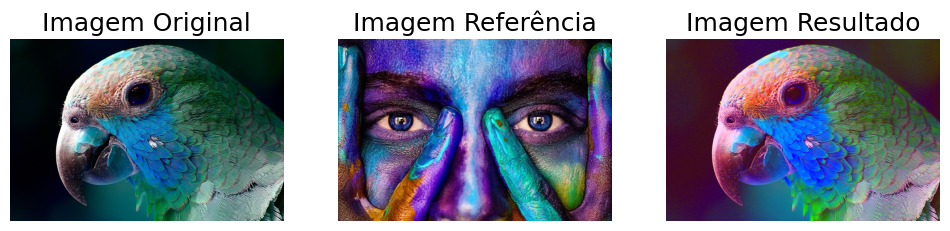

In [359]:
base = np.array(Image.open('/content/original.png'))
base = cv2.cvtColor(base, cv2.COLOR_BGR2RGB)

reference = np.array(Image.open('/content/reference.png'))
reference = cv2.cvtColor(reference, cv2.COLOR_BGR2RGB)

content   = np.array(base)
reference = np.array(reference)

nova_imagem = colortrans.transfer_lhm(content, reference)
resultado = Image.fromarray(nova_imagem)
resultado = np.array(resultado)

fig, axes = pylab.subplots(ncols=3, sharex=True, sharey=True, figsize=(12,6))

# Configurando o plot da imagem original
axes[0].set_title('Imagem Original', size=18)
axes[0].imshow(base)

# Configurando o plot da imagem filtrada
axes[1].set_title('Imagem Referência', size=18)
axes[1].imshow(reference)


# Configurando o plot da imagem filtrada
axes[2].set_title('Imagem Resultado', size=18)
axes[2].imshow(resultado)

for ax in axes:
    ax.axis('off')

pylab.show()

# Enunciado 7

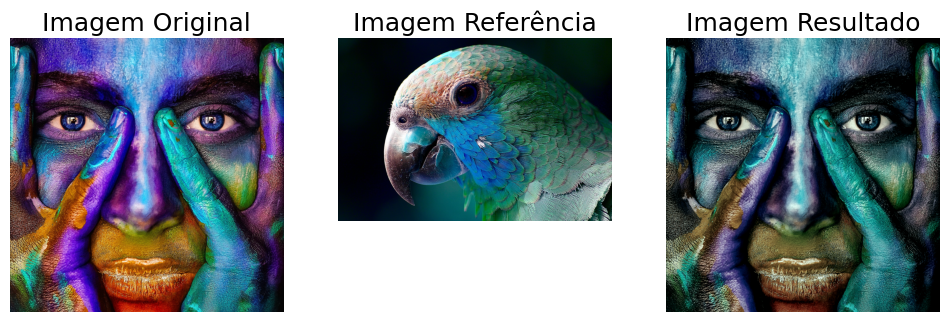

In [360]:
base = np.array(Image.open('/content/reference.png'))
base = cv2.cvtColor(base, cv2.COLOR_BGR2RGB)

reference = np.array(Image.open('/content/original.png'))
reference = cv2.cvtColor(reference, cv2.COLOR_BGR2RGB)

content   = np.array(base)
reference = np.array(reference)

nova_imagem = colortrans.transfer_lhm(content, reference)
resultado = Image.fromarray(nova_imagem)
resultado = np.array(resultado)

fig, axes = pylab.subplots(ncols=3, sharex=True, sharey=True, figsize=(12,6))

# Configurando o plot da imagem original
axes[0].set_title('Imagem Original', size=18)
axes[0].imshow(base)

# Configurando o plot da imagem filtrada
axes[1].set_title('Imagem Referência', size=18)
axes[1].imshow(reference)

# Configurando o plot da imagem filtrada
axes[2].set_title('Imagem Resultado', size=18)
axes[2].imshow(resultado)

for ax in axes:
    ax.axis('off')

pylab.show()

# Enunciado 8

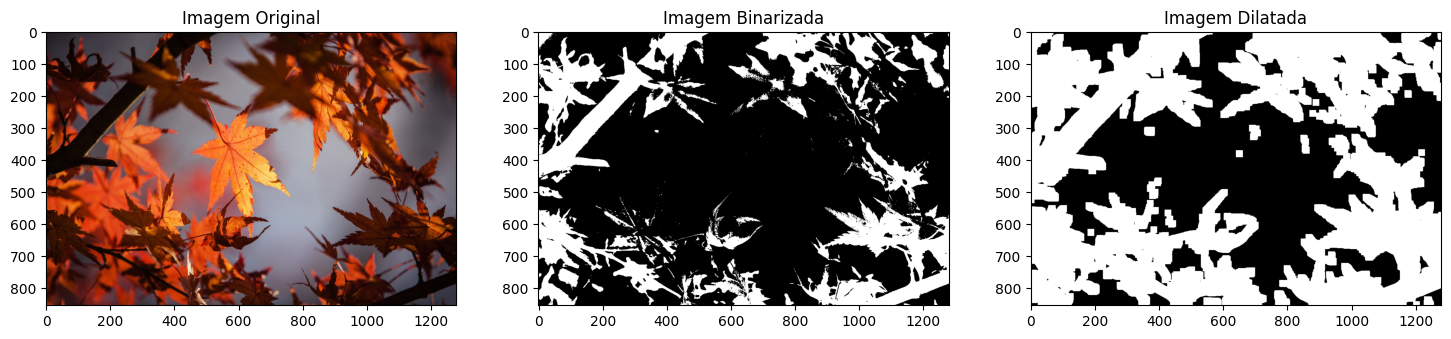

In [361]:
# Kernel 3x3 e Imagem Dilatada para iterations=10

# Link da imagem
img_url = "https://cdn.pixabay.com/photo/2016/05/25/18/02/maple-1415541_1280.jpg"
response = requests.get(img_url)
img_data = BytesIO(response.content)
img_pil = Image.open(img_data)

gray_img = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2GRAY)

# Condição rgb2gray(img_load) < 0.15
threshold = 0.15
binary_img = (gray_img < threshold * 255).astype(np.uint8) * 255

binary_img = binary_img.astype(np.uint8)

# kernel (3, 3) usando MORPH_RECT
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Dilatação para iterations=10
dilated_img = cv2.dilate(binary_img, kernel, iterations=10)

# Mostrar as imagens em um subplot
plt.figure(figsize=(18, 18))
plt.subplot(1, 3, 1)
plt.title("Imagem Original")
plt.imshow(img_pil)

plt.subplot(1, 3, 2)
plt.title("Imagem Binarizada")
plt.imshow(binary_img, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Imagem Dilatada")
plt.imshow(dilated_img, cmap='gray')

plt.show()

# Enunciado 9

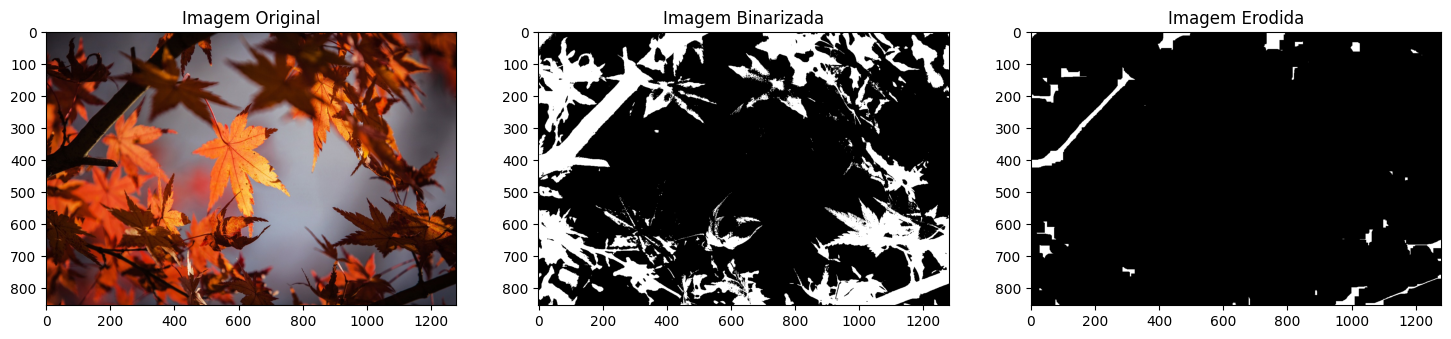

In [362]:
# Kernel 3x3 e Imagem Erodida para iterations=15

# Link da imagem
img_url = "https://cdn.pixabay.com/photo/2016/05/25/18/02/maple-1415541_1280.jpg"
response = requests.get(img_url)
img_data = BytesIO(response.content)
img_pil = Image.open(img_data)

gray_img = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2GRAY)

# Condição rgb2gray(img_load) < 0.15
threshold = 0.15
binary_img = (gray_img < threshold * 255).astype(np.uint8) * 255

binary_img = binary_img.astype(np.uint8)

# kernel (3, 3) usando MORPH_RECT
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

erode_img = cv2.erode(binary_img, kernel, iterations=15)

# Mostrar as imagens em um subplot
plt.figure(figsize=(18, 18))
plt.subplot(1, 3, 1)
plt.title("Imagem Original")
plt.imshow(img_pil)

plt.subplot(1, 3, 2)
plt.title("Imagem Binarizada")
plt.imshow(binary_img, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Imagem Erodida")
plt.imshow(erode_img, cmap='gray')
plt.show()


# Enunciado 10

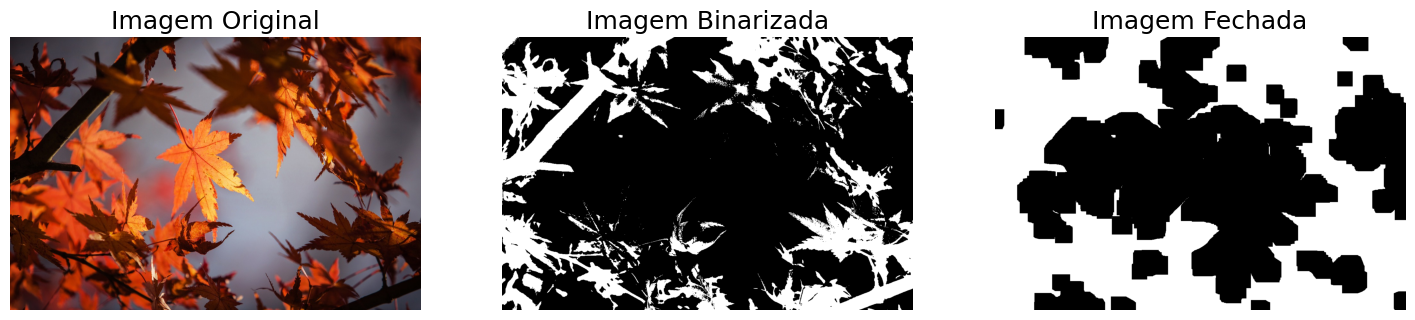

In [363]:
# Kernel 47x47 e Imagem com Fechamento

# Link da imagem
url = "https://cdn.pixabay.com/photo/2016/05/25/18/02/maple-1415541_1280.jpg"
response = requests.get(url)
img_data = np.asarray(bytearray(response.content), dtype=np.uint8)
img = cv2.imdecode(img_data, cv2.IMREAD_COLOR)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)
img_bin = np.where(img_gray < 0.15 * 255, 255, 0).astype(np.uint8)

img_bin = img_bin.astype(np.uint8)

# kernel (47,47)
kernel_47x47 = cv2.getStructuringElement(cv2.MORPH_RECT, (47, 47))
img_closed = cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, kernel_47x47)

# Mostre as imagens em um subplot
plt.figure(figsize=(18, 18))
plt.subplot(1, 3, 1)
plt.title("Imagem Original", size=18)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Imagem Binarizada", size=18)
plt.imshow(img_bin, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Imagem Fechada", size=18)
plt.imshow(img_closed, cmap='gray')
plt.axis('off')

plt.show()

# Enunciado 11

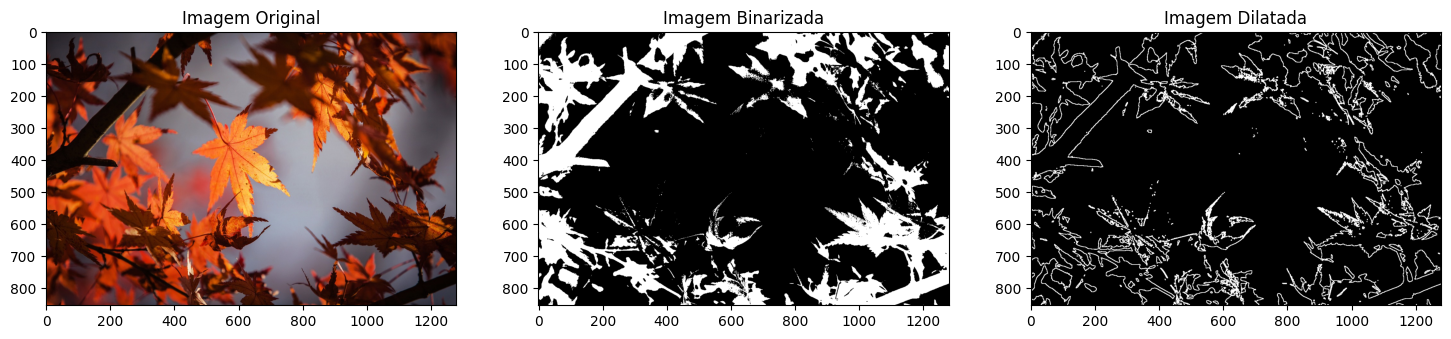

In [364]:
# Kernel 3x3 e Imagem com gradiente morfológico

# Link da imagem
img_url = "https://cdn.pixabay.com/photo/2016/05/25/18/02/maple-1415541_1280.jpg"
response = requests.get(img_url)
img_data = BytesIO(response.content)
img_pil = Image.open(img_data)

gray_img = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2GRAY)

threshold = 0.15
binary_img = (gray_img < threshold * 255).astype(np.uint8) * 255

binary_img = binary_img.astype(np.uint8)

# Obter um kernel (3, 3) usando MORPH_RECT
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Aplicar a gradiente
gradient_image = cv2.morphologyEx(binary_img, cv2.MORPH_GRADIENT, kernel)

# 7. Mostrar as imagens em um subplot
plt.figure(figsize=(18, 18))
plt.subplot(1, 3, 1)
plt.title("Imagem Original")
plt.imshow(img_pil)

plt.subplot(1, 3, 2)
plt.title("Imagem Binarizada")
plt.imshow(binary_img, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Imagem Dilatada")
plt.imshow(gradient_image , cmap='gray')

plt.show()

# Enunciado 12

In [365]:
# Importações
import tensorflow as tf

# Carregando a base de dados
mnist = tf.keras.datasets.mnist

# Carregando o conjunto de treinamento e o conjunto de teste
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Execução 1

In [366]:
# Estruturando a arquitetura da rede/ modelo
model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(784, activation=tf.nn.tanh),
 tf.keras.layers.Dense(393, activation=tf.nn.tanh),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compilando o modelo
## Utiliza o otimizador ADAM
## Função de perda: sparse_categorical_crossentropy
## Métrica empregada: accuracy

model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

# Treinamento do modelo com 7 épocas
model.fit(x_train, y_train, epochs=7, verbose = 1)

Epoch 1/7
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2304 - accuracy: 0.9305
Epoch 2/7
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1117 - accuracy: 0.9654
Epoch 3/7
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0843 - accuracy: 0.9736
Epoch 4/7
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0679 - accuracy: 0.9779
Epoch 5/7
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0551 - accuracy: 0.9823
Epoch 6/7
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0487 - accuracy: 0.9839
Epoch 7/7
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0423 - accuracy: 0.9857


In [367]:
# Avaliação do modelo
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0962 - accuracy: 0.9716


[0.09620890766382217, 0.9715999960899353]

## Execução 2

In [368]:
# Estruturando a arquitetura da rede/ modelo
model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(784, activation=tf.nn.tanh),
 tf.keras.layers.Dense(393, activation=tf.nn.tanh),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compilando o modelo
## Utiliza o otimizador ADAM
## Função de perda: sparse_categorical_crossentropy
## Métrica empregada: accuracy

model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

# Treinamento do modelo com 7 épocas
model.fit(x_train, y_train, epochs=7, verbose = 1)

Epoch 1/7
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2324 - accuracy: 0.9288
Epoch 2/7
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1108 - accuracy: 0.9654
Epoch 3/7
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0848 - accuracy: 0.9731
Epoch 4/7
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0673 - accuracy: 0.9787
Epoch 5/7
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0565 - accuracy: 0.9817
Epoch 6/7
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0484 - accuracy: 0.9841
Epoch 7/7
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0432 - accuracy: 0.9853


In [369]:
# Avaliação do modelo
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0836 - accuracy: 0.9746


[0.08359313756227493, 0.9746000170707703]

## Seção de Resultados

Segue abaixo uma tabela com os valores de perda e acurácia para 2 execuções, junto aos dados de teste e com a arquitetura sugerida pelo enunciado. </p>

|   Execução  | Perda (%) | Acurácia (%) |
|:-----------:|:-----:|:--------:|
|      1      |  0,0749 |   97,70  |
|      2      |  0,086 |   97,49  |

- Aplique melhorias ao código, de forma que seu resultado supere a estrutura fornecida.

- Realize 2 execuções de sua estrutura proposta.

- Forneça em seu relatório uma tabela com seus resultados obtidos (Perda e Acurácia) para as duas execuções de sua arquitetura.

- Anexe seu código, de forma legível, à seção de resposta desta questão no relatório.